In [1]:
# A couple of datasets have been generated from the Eric Huff's code (both images and parameters).
# These samples took varying amounts of time to generate (some took minutes, others seconds).
# I am going to check here to see if anything looks sketch about these samples, or if their generation
# times just depended on resources allocated by AWS at the time. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load Data: Dataset 0

In [3]:
# load data
npz_catalog = np.load('/Users/imanwahle/Desktop/galaxy_data/illustris_catalogs0.npz')
npz_data = np.load('/Users/imanwahle/Desktop/galaxy_data/illustris_data0.npz')                           

# print shape stats
print('Image input shape: ', npz_data['inputs'].shape)
print('Image target shape: ', npz_data['targets'].shape)
print()
n_params = 0
for k in npz_catalog.iterkeys():
    n_params += 1
    print('Parameter {} shape: {}'.format(k, npz_catalog[k].shape))

print() 
print('Number of parameters: ', n_params)

Image input shape:  (5000, 5202)
Image target shape:  (5000, 5202)

Parameter photom_g shape: (5000,)
Parameter photom_r shape: (5000,)
Parameter photom_i shape: (5000,)
Parameter photom_z shape: (5000,)
Parameter radius shape: (5000,)
Parameter stellar_mass shape: (5000,)

Number of parameters:  6


# Visually Inspect Input and Target Images: Dataset 0

In [8]:
indices

array([1035,  726, 3315, 4382, 4350])

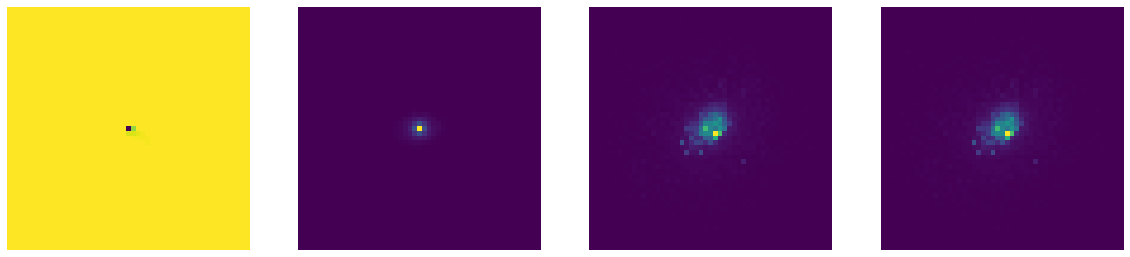

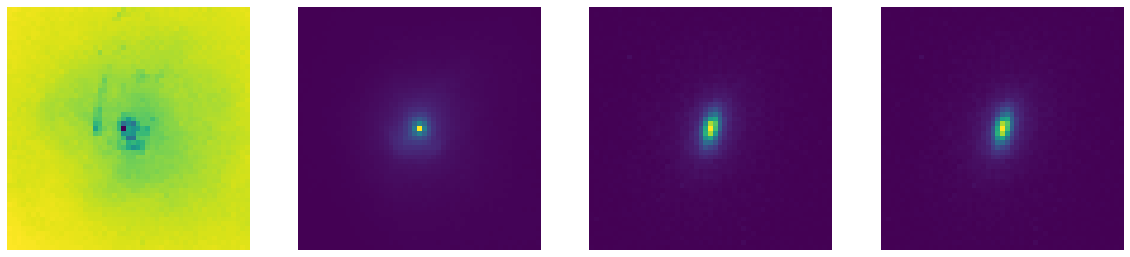

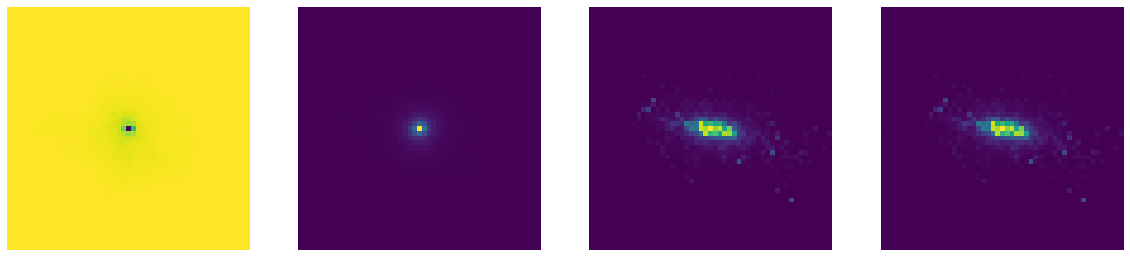

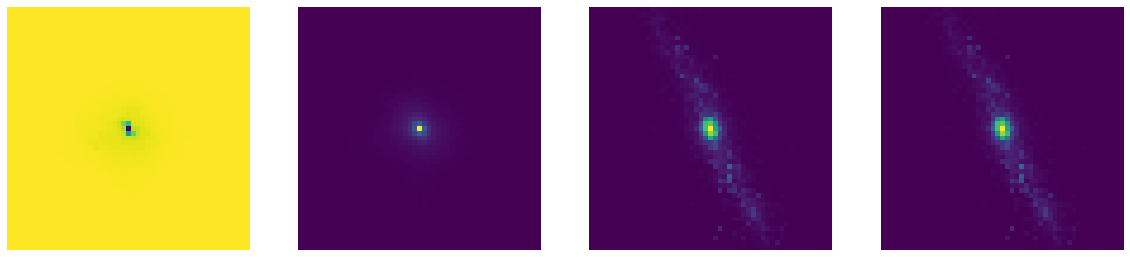

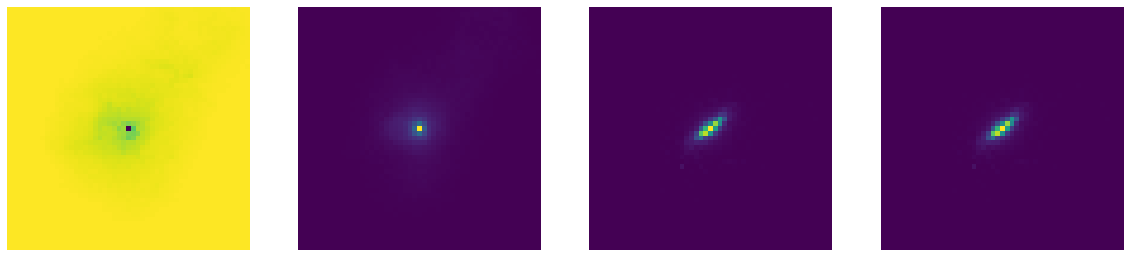

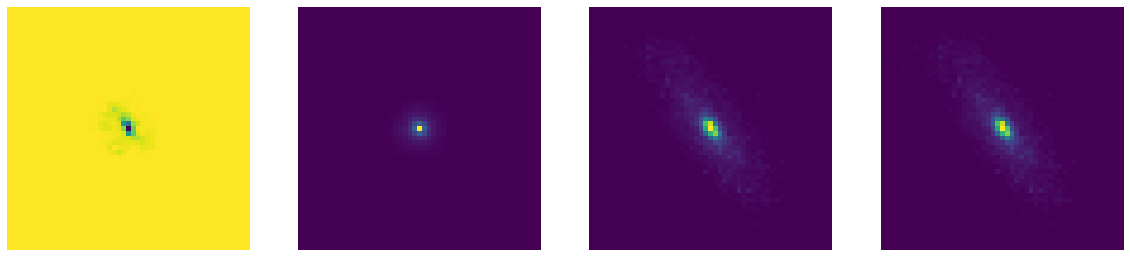

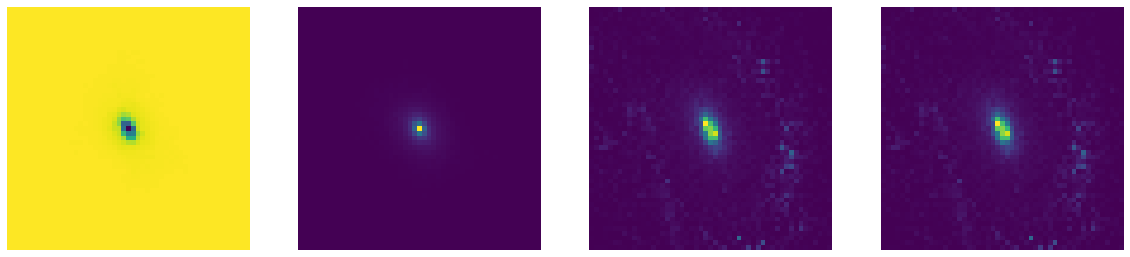

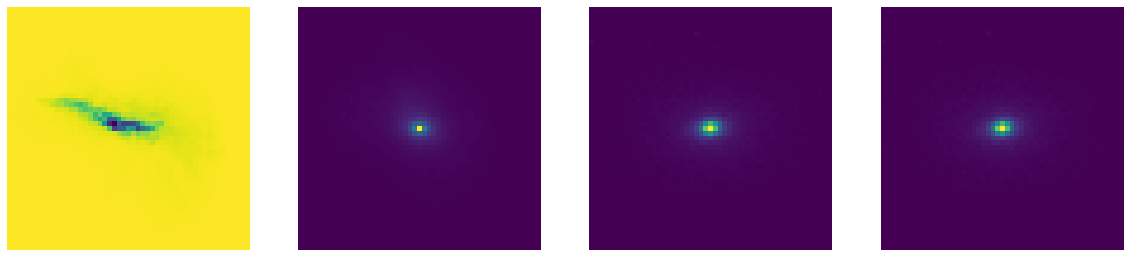

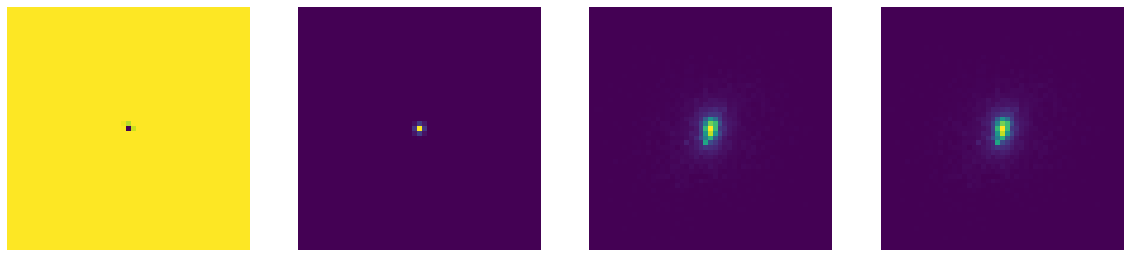

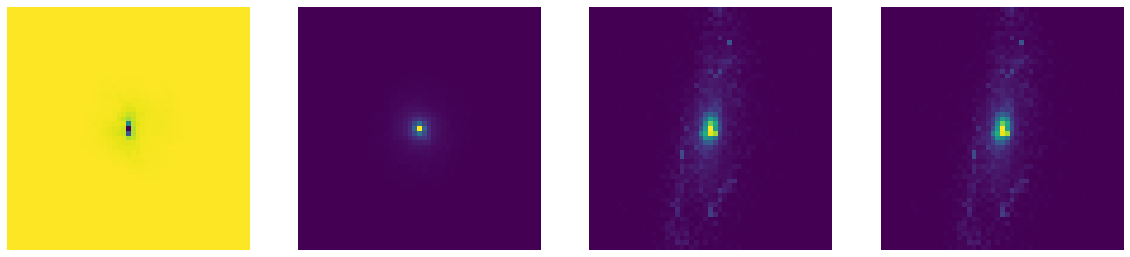

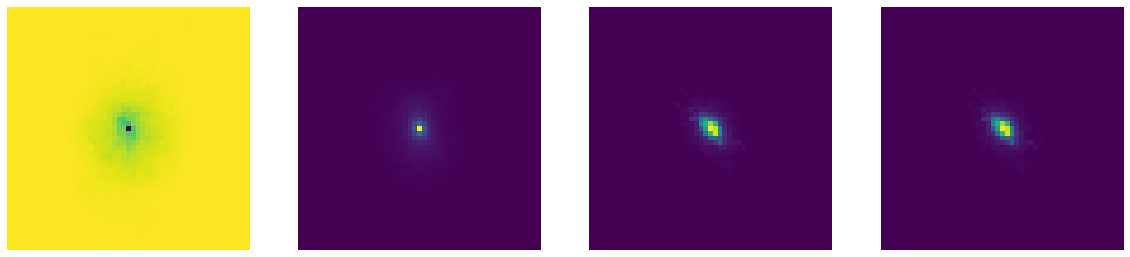

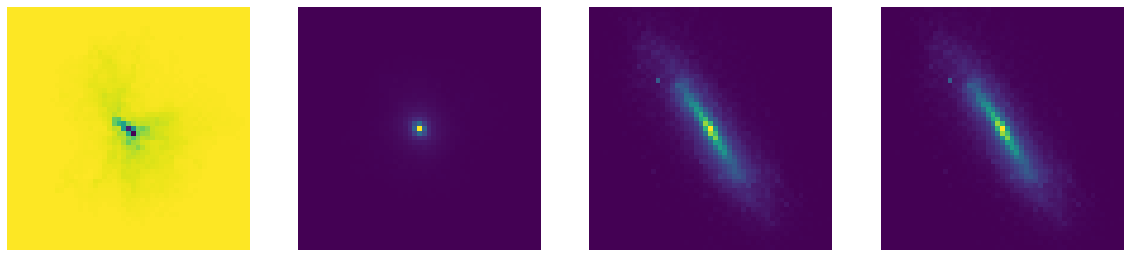

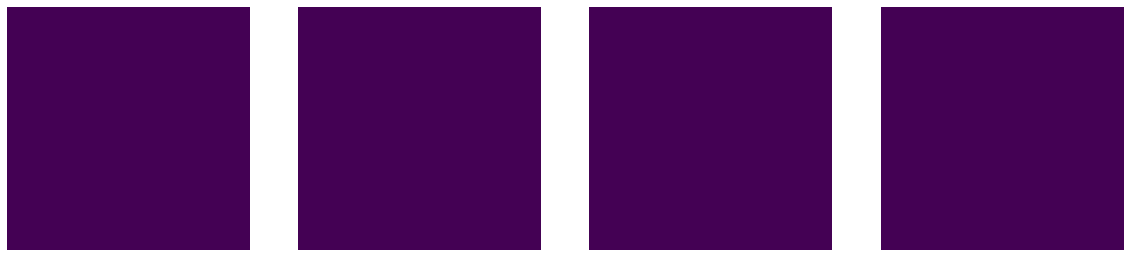

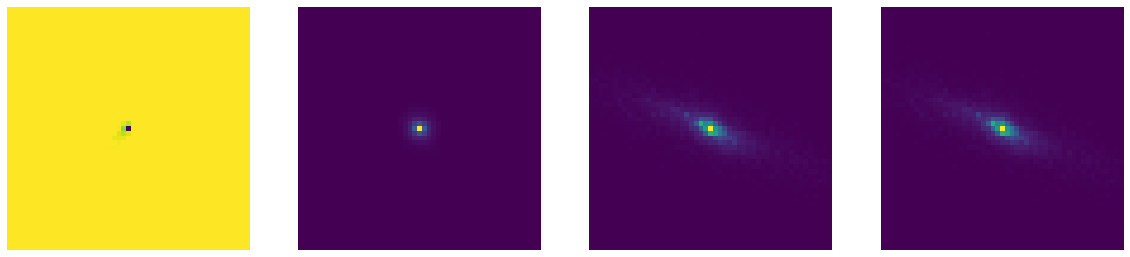

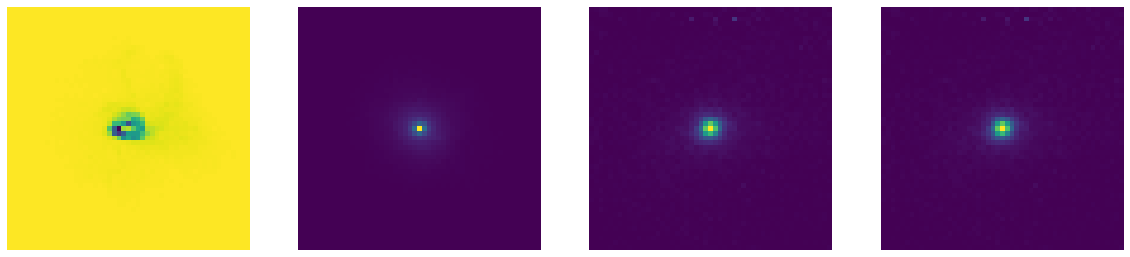

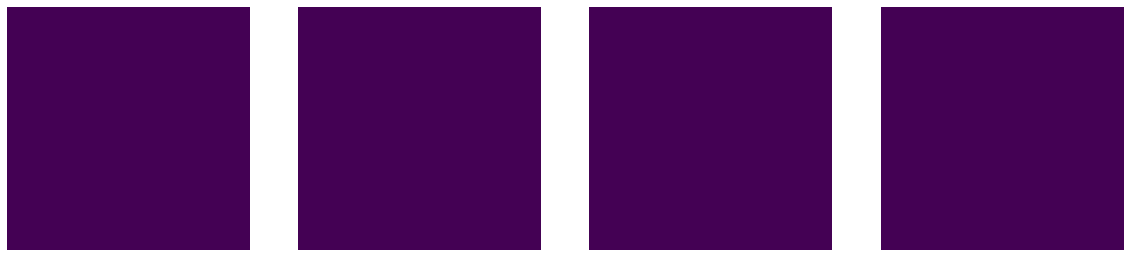

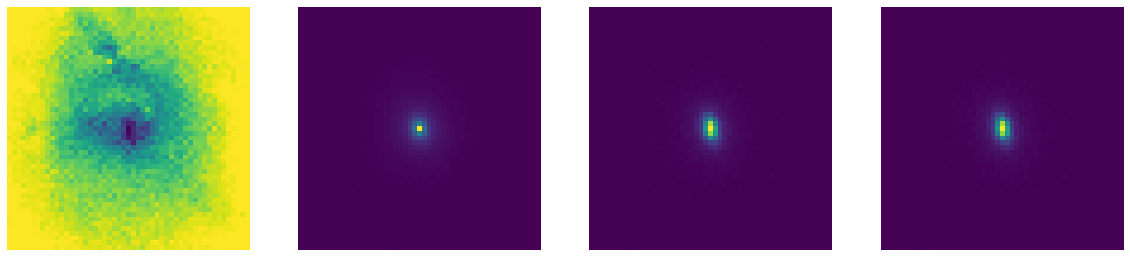

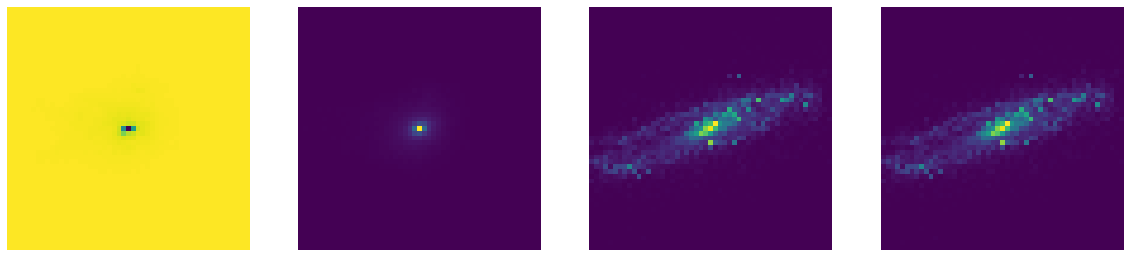

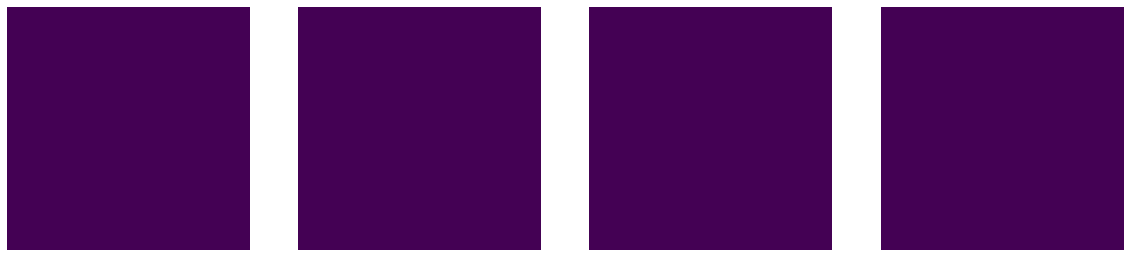

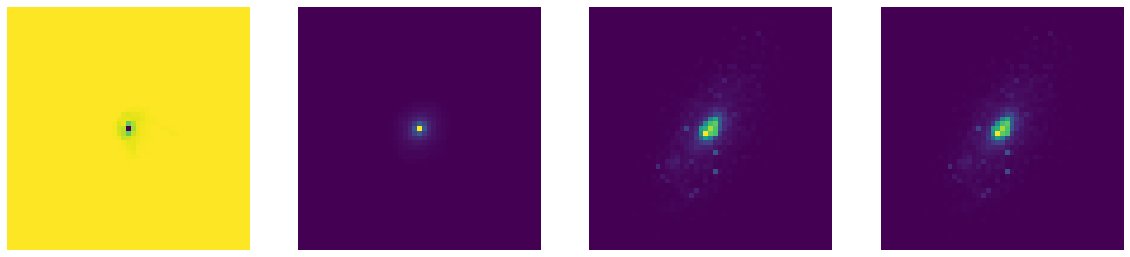

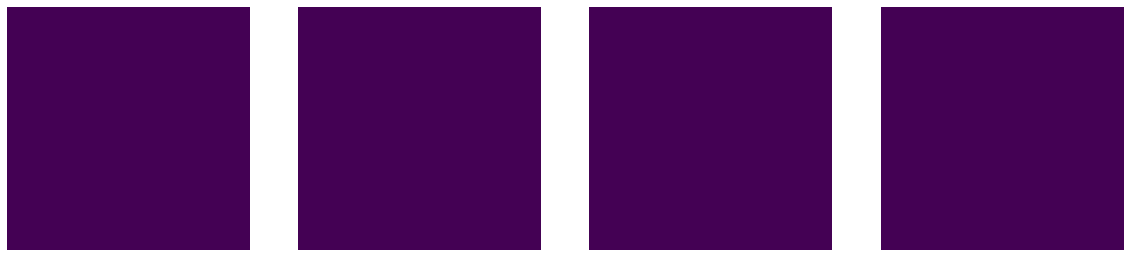

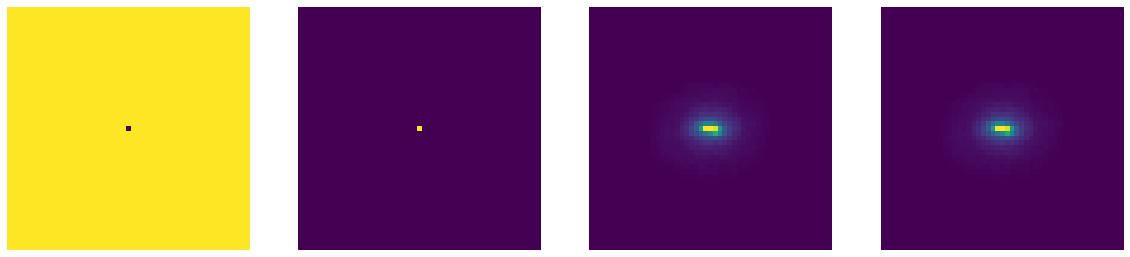

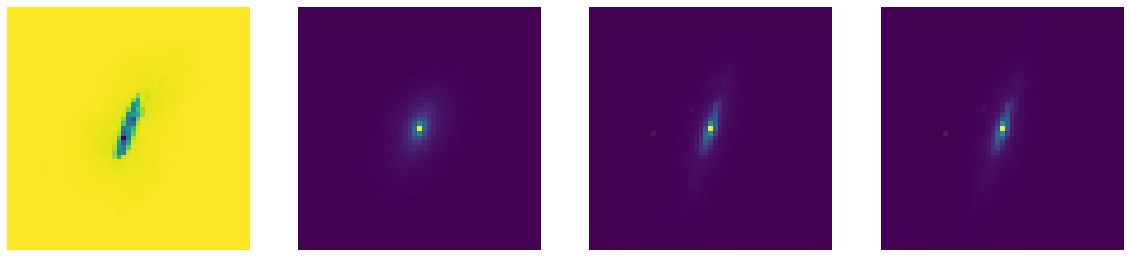

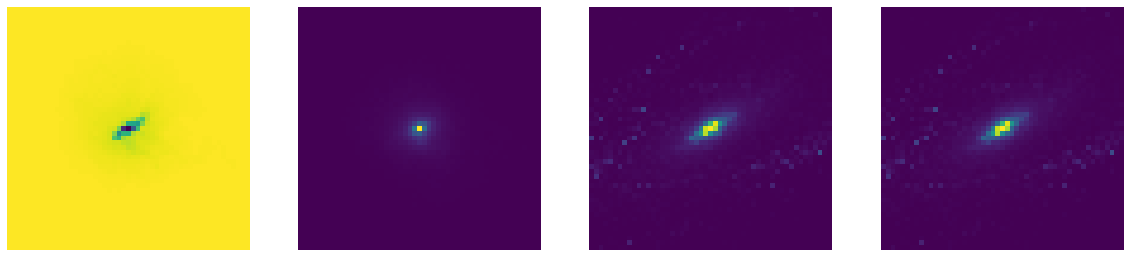

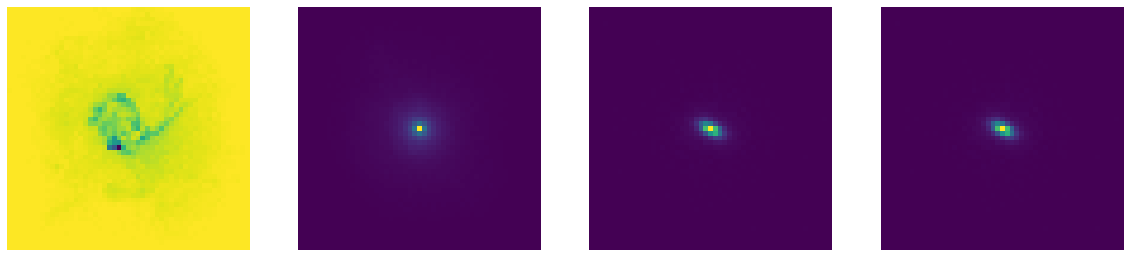

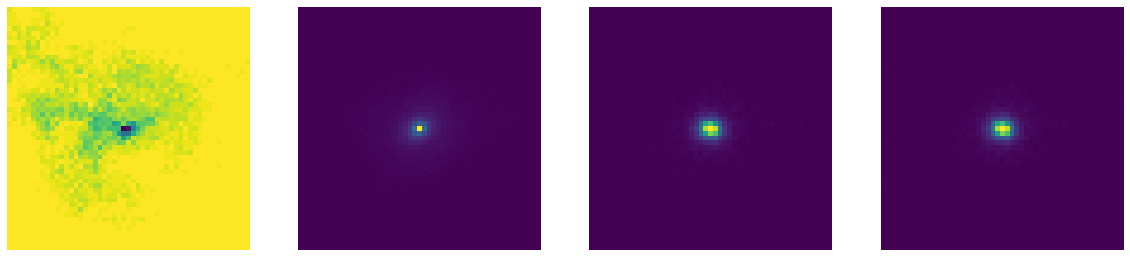

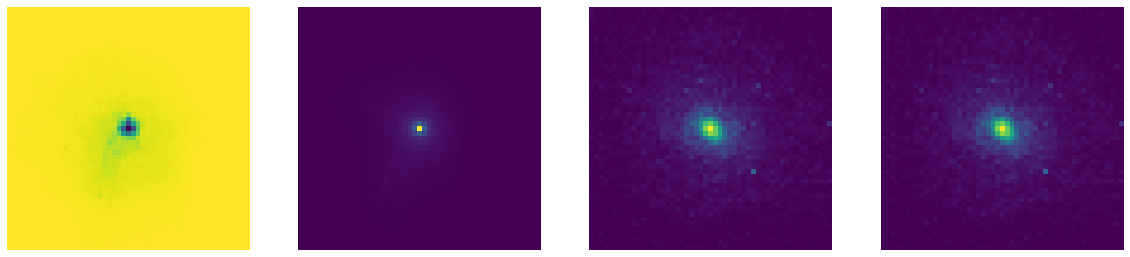

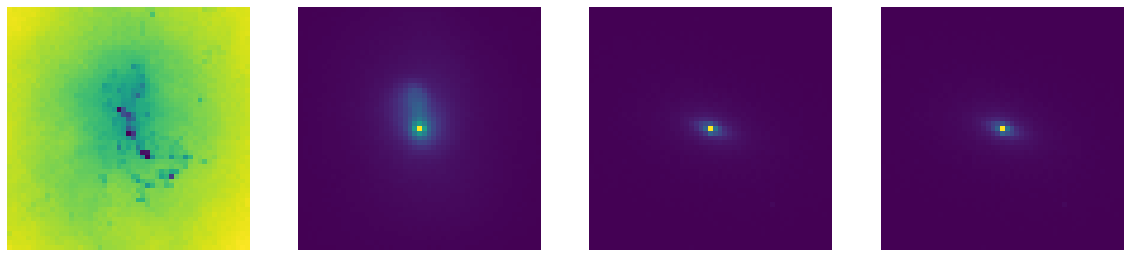

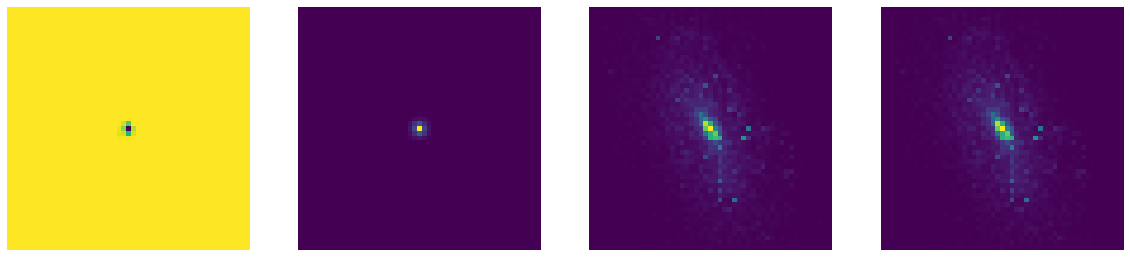

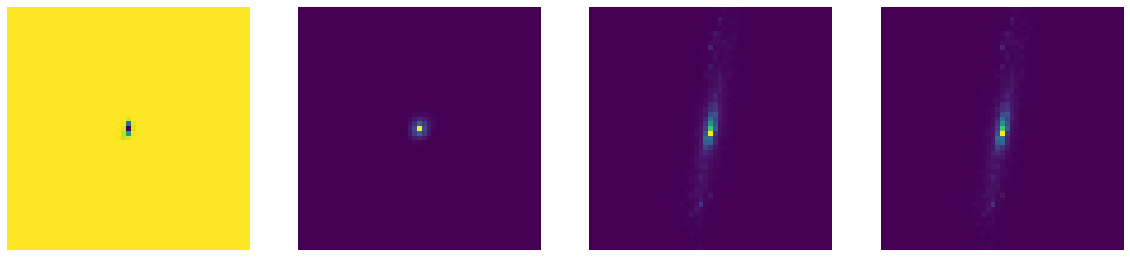

In [14]:
n_samples = 5
dim = 51
indices = np.random.choice(npz_data['inputs'].shape[0], n_samples, replace=False)
fig,ax = plt.subplots(n_samples, 4, figsize=(20,60))
for i,idx in enumerate(indices):
    i0 = npz_data['inputs'][idx,:5202//2]
    i1 = npz_data['inputs'][idx,5202//2:]
    t0 = npz_data['targets'][idx,5202//2:]
    t1 = npz_data['targets'][idx,5202//2:]
    ax[i, 0].imshow(i0.reshape((dim,dim)))
    ax[i, 1].imshow(i1.reshape((dim,dim)))
    ax[i, 2].imshow(t0.reshape((dim,dim)))
    ax[i, 3].imshow(t1.reshape((dim,dim)))
    for a in range(4):
        ax[i,a].axis('off')
plt.show()

# Visually Inspect Parameter Distributions: Dataset 0

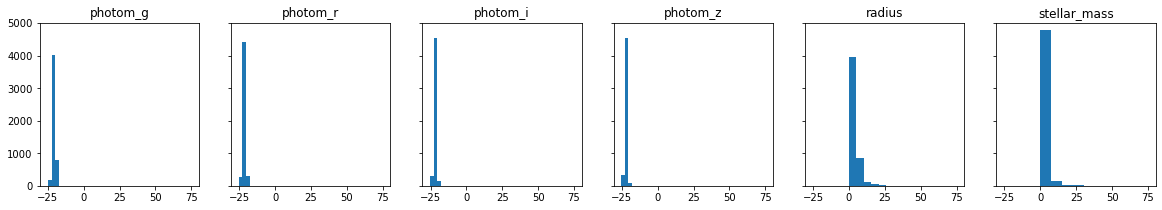

In [13]:
fig,ax = plt.subplots(1, n_params, figsize=(20,3), sharex=True, sharey=True)
for ki,k in enumerate(npz_catalog.iterkeys()):
    ax[ki].hist(npz_catalog[k],10)
    ax[ki].set_title(k)

plt.show()

# Check How Many Runs Failed: Dataset 0

In [22]:
n_failed_inputs = np.sum(np.sum(npz_data['inputs'],axis=1)==0)
n_failed_targets = np.sum(np.sum(npz_data['targets'],axis=1)==0)
print('These should be the same:')
print(n_failed_inputs)
print(n_failed_targets)

all_params = np.zeros((npz_data['inputs'].shape[0],1))
for k in npz_catalog.iterkeys():
    all_params = np.hstack([all_params, np.expand_dims(npz_catalog[k],-1)])
all_params = all_params[:,1:]
n_failed_params =  np.sum(np.sum(all_params,axis=1)==0)
print(n_failed_params)

These should be the same:
597
597
3


In [41]:
# Question: do we expect all parameters to equal 0 when the images equal 0?

# Load Data: Dataset 1

In [42]:
# load data
npz_catalog = np.load('/Users/imanwahle/Desktop/galaxy_data/illustris_catalogs1.npz')
npz_data = np.load('/Users/imanwahle/Desktop/galaxy_data/illustris_data1.npz')                           

# print shape stats
print('Image input shape: ', npz_data['inputs'].shape)
print('Image target shape: ', npz_data['targets'].shape)
print()
n_params = 0
for k in npz_catalog.iterkeys():
    n_params += 1
    print('Parameter {} shape: {}'.format(k, npz_catalog[k].shape))

print() 
print('Number of parameters: ', n_params)

Image input shape:  (10000, 5202)
Image target shape:  (10000, 5202)

Parameter photom_g shape: (10000,)
Parameter photom_r shape: (10000,)
Parameter photom_i shape: (10000,)
Parameter photom_z shape: (10000,)
Parameter radius shape: (10000,)
Parameter stellar_mass shape: (10000,)

Number of parameters:  6


# Visually Inspect Input and Target Images: Dataset 1

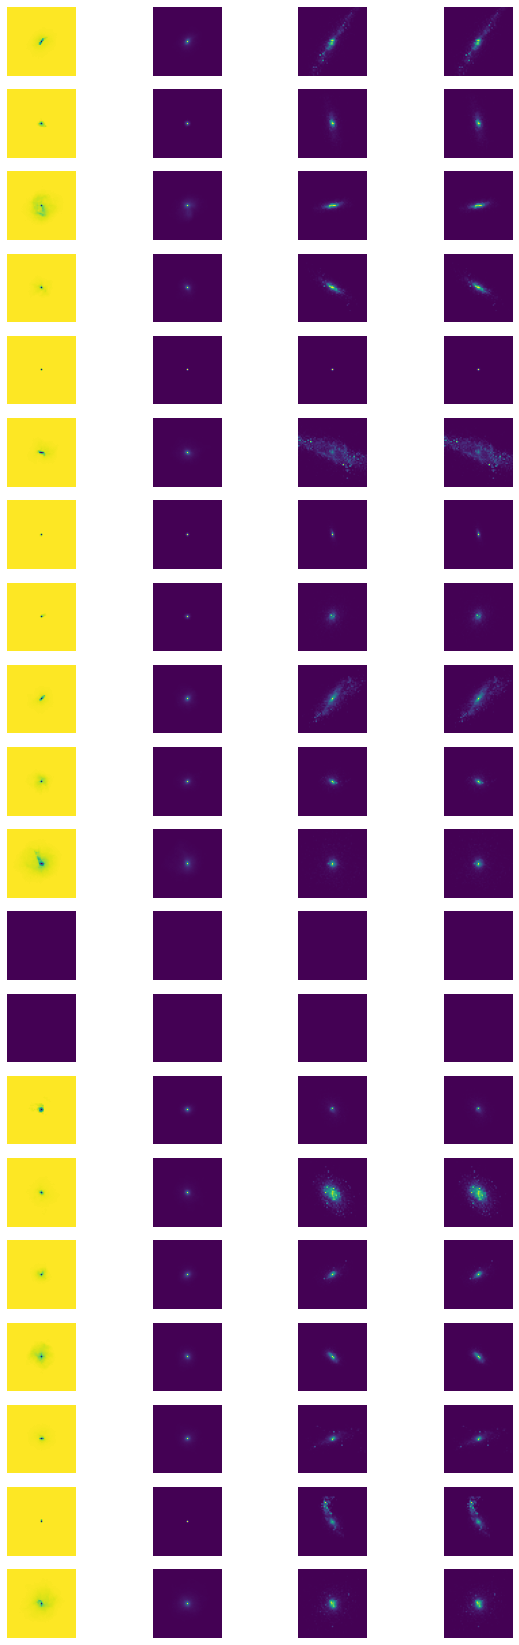

In [50]:
n_samples = 20
dim = 51
indices = np.random.choice(range(5000,npz_data['inputs'].shape[0]), n_samples, replace=False)
fig,ax = plt.subplots(n_samples, 4, figsize=(10,30))
for i,idx in enumerate(indices):
    i0 = npz_data['inputs'][idx,:5202//2]
    i1 = npz_data['inputs'][idx,5202//2:]
    t0 = npz_data['targets'][idx,5202//2:]
    t1 = npz_data['targets'][idx,5202//2:]
    ax[i, 0].imshow(i0.reshape((dim,dim)))
    ax[i, 1].imshow(i1.reshape((dim,dim)))
    ax[i, 2].imshow(t0.reshape((dim,dim)))
    ax[i, 3].imshow(t1.reshape((dim,dim)))
    for a in range(4):
        ax[i,a].axis('off')
plt.show()

# Visually Inspect Parameter Distributions: Dataset 1

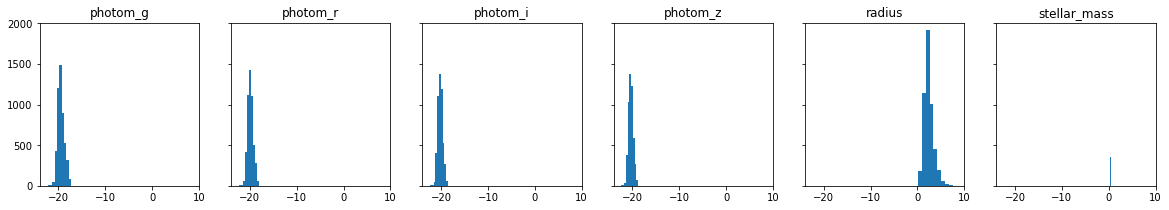

In [51]:
fig,ax = plt.subplots(1, n_params, figsize=(20,3), sharex=True, sharey=True)
for ki,k in enumerate(npz_catalog.iterkeys()):
    ax[ki].hist(npz_catalog[k][5000:],10)
    ax[ki].set_title(k)

plt.show()

# Check How Many Runs Failed: Dataset 1

In [52]:
n_failed_inputs = np.sum(np.sum(npz_data['inputs'][5000:,:],axis=1)==0)
n_failed_targets = np.sum(np.sum(npz_data['targets'][5000:,:],axis=1)==0)
print('These should be the same:')
print(n_failed_inputs)
print(n_failed_targets)

all_params = np.zeros((npz_data['inputs'].shape[0]-5000,1))
for k in npz_catalog.iterkeys():
    all_params = np.hstack([all_params, np.expand_dims(npz_catalog[k][5000:],-1)])
all_params = all_params[:,1:]
n_failed_params =  np.sum(np.sum(all_params,axis=1)==0)
print(n_failed_params)

These should be the same:
760
760
0


In [48]:
# Note: 5000 of this dataset should be empty because we didn't sample the first 5000 and left those entries empty. I went through and hacked the first half of the dataset off everywhere.

In [49]:
# In total between the two datasets, we have 10000 - 760 - 597 = 8648 samples